### Importing Libraries
We import essential libraries for data manipulation, visualization, and model building:
- `numpy`: For numerical computations.
- `matplotlib.pyplot`: For visualizing data.
- `tensorflow`: For building and training the machine learning model.
Additionally, we suppress TensorFlow warnings to display only error messages for cleaner output.


In [13]:
# importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# suppress warnings - only error messages will be shown
tf.get_logger().setLevel('ERROR')

### Loading and Normalizing the MNIST Dataset
The MNIST dataset, containing images of handwritten digits (0-9), is loaded and split into training and testing sets.
We normalize pixel values to the range [0, 1] for better model performance. This ensures that the input values are standardized and suitable for neural network training.


In [15]:
# load MNIST dataset
# more info - https://keras.io/api/datasets/mnist/#load_data-function
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# normalize data to range [0, 1]
# grayscale pixel values range from 0 to 255, where 0 is black, and 255 is white.
train_data = train_data / 255.0
test_data = test_data / 255.0

### Flattening Images and Reducing Dataset Size
- The 28x28 images are flattened into 1D arrays of 784 pixels for compatibility with the model.
- For quicker training during prototyping, we limit the training dataset size to 10,000 samples. This reduces training time while retaining enough data for learning.


In [16]:
# flatten 28x28 images to 1D arrays of 784 pixels
train_data = train_data.reshape(train_data.shape[0], -1)
test_data = test_data.reshape(test_data.shape[0], -1)

# restrict training dataset size for quicker training
max_samples = 10000 # limit on number of training dataset 
train_data = train_data[:max_samples] # select all rows starting from index 0 up to, but not including, max_examples
train_labels = train_labels[:max_samples] # similar as above

### Visualizing a Sample Image
A function is defined to display an image from the test dataset along with its label. This allows us to visually inspect the data and verify the labels.
An example is provided to display the first image in the test dataset.


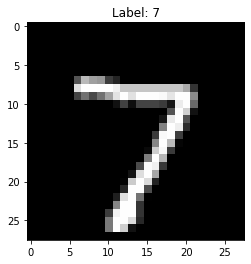

In [17]:
# display a sample image
def display(i):
    img = test_data[i].reshape((28, 28)) 
    plt.title(f"Label: {test_labels[i]}") 
    plt.imshow(img, cmap='gray') 

# example
display(0)

### Building the Model
We construct a simple linear classifier using TensorFlow's Keras API:
- **Input Layer:** Accepts flattened images as input (784 pixels).
- **Hidden Layer:** Adds 32 neurons with ReLU activation to learn intermediate features.
- **Output Layer:** Outputs probabilities for 10 classes (digits 0-9) using a softmax activation function.
The model is compiled with the Adam optimizer, sparse categorical crossentropy as the loss function, and accuracy as the evaluation metric.

In [18]:
# build a simple linear classifier using Keras
# set the random seed
tf.random.set_seed(50)

# create the model
model = tf.keras.Sequential()

# add Input layer
model.add(tf.keras.layers.InputLayer(input_shape=[784]))

# add Hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu'))

# add Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training and Evaluating the Model
- The model is trained on the training dataset for 20 epochs with a batch size of 100 samples.
- After training, the model is evaluated on the test dataset to measure its accuracy. The accuracy is printed to the console.


In [19]:
# train the model
history = model.fit(train_data, train_labels, batch_size=100, epochs=20, verbose=1)

# evaluate model
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4826 - loss: 1.6468
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.4702
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.3439
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9220 - loss: 0.2913
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9289 - loss: 0.2590
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9361 - loss: 0.2354
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9397 - loss: 0.2163
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9439 - loss: 0.2003
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9477 - loss: 0.1863  
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9511 - loss: 0.1740
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9547 - loss: 0.1631
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

### Making Predictions
The model predicts the class of a single sample from the test dataset:
1. A single test sample is selected.
2. The model generates predicted probabilities for each class.
3. The class with the highest probability is identified as the predicted class.
4. If the prediction matches the true label, the corresponding image is displayed for visual confirmation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: 7, Label: 7


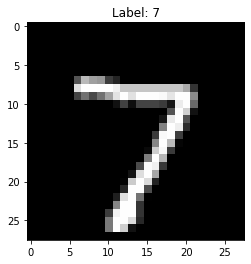

In [20]:
# predict on a single test sample
sample_index = 0 # index of selected sample

# select a single test sample
test_sample = test_data[sample_index:sample_index+1]

# make a prediction
predicted_probabilities = model.predict(test_sample)

# find the class with the highest probability
predicted_class = np.argmax(predicted_probabilities, axis=-1)

print(f"Prediction: {predicted_class[0]}, Label: {test_labels[sample_index]}")

if predicted_class[0] == test_labels[sample_index]:
    display(sample_index)

### Visualizing Training Loss
The training loss is plotted over the epochs to show how the model's performance improves during training. This helps in understanding whether the model is learning effectively.


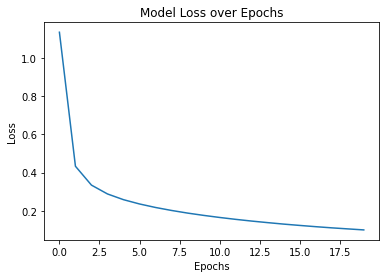

In [21]:
# plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()